## Decision Tree Classification

In [1]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

### Perform Cross Validation

In [3]:
# Define the model
clf_cv = RandomForestClassifier()

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10, shuffle=False)

# Evaluate the model using cross-validation
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [6]:
# Print scores
print('Macro:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print()
print('Micro:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

Macro:
Precision: 0.848 (0.144)
Recall: 0.804 (0.164)
F1 score: 0.817 (0.155)

Micro:
Precision: 0.950 (0.052)
Recall: 0.950 (0.052)
F1 score: 0.950 (0.052)


### Train the model

In [7]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

In [8]:
# Create and train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\dell\AppData\Local\Temp\ipykernel_7492\3190882598.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [10]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9630484988452656
Precision: 0.7647058823529411
Recall: 0.7647058823529411
F1: 0.7647058823529412


### Visualize the model

In [11]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[391,   8],
       [  8,  26]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

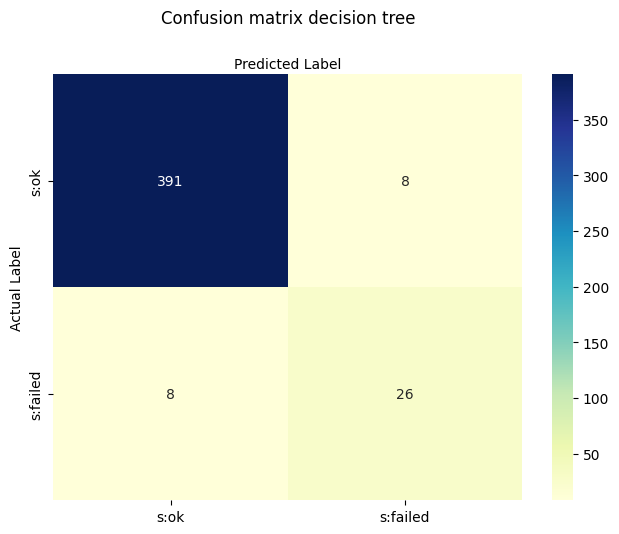

In [12]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [13]:
pickle.dump(clf, open("./models/random_forest.p", "wb"))